In [27]:
#importing the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


In [28]:
#read the csv file
df = pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
#describing the dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [32]:
#checking for null values
df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False


In [30]:
#droping the serial number column
df.drop(labels='Serial No.', axis=1, inplace=True)


In [31]:
#displaying the df
df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


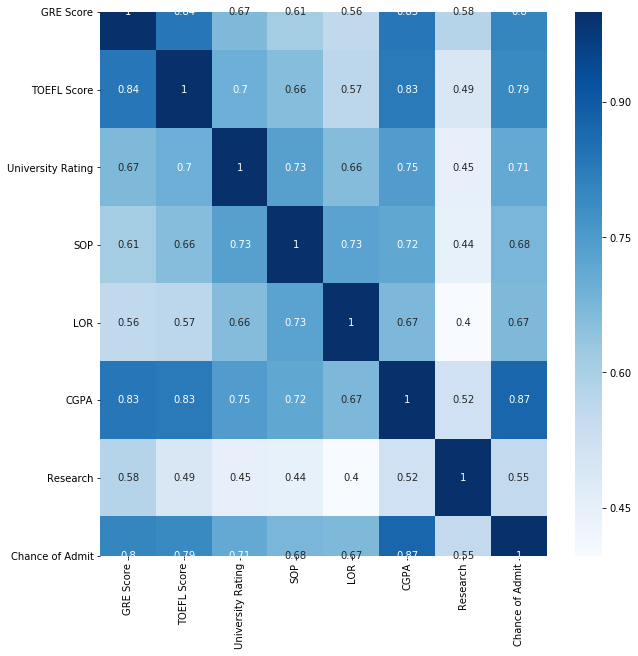

In [6]:
#finding the relation amoung the columns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

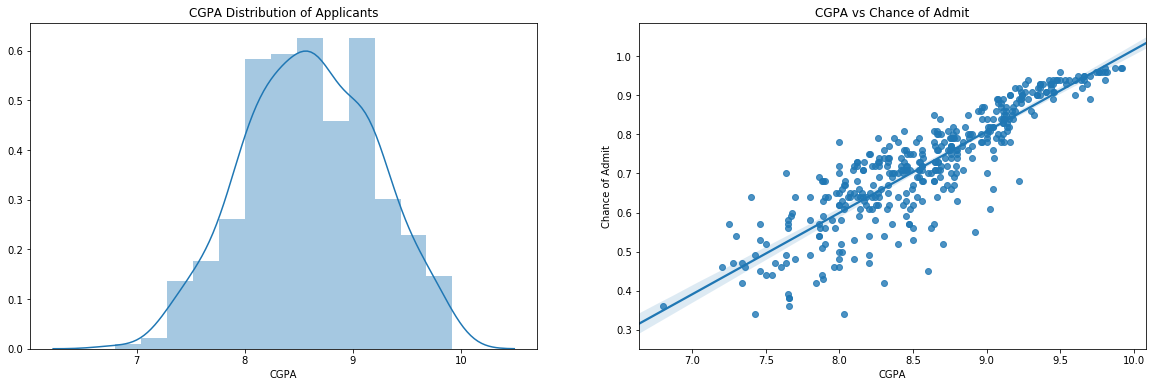

In [7]:
#ploting the dist and regresion plot 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

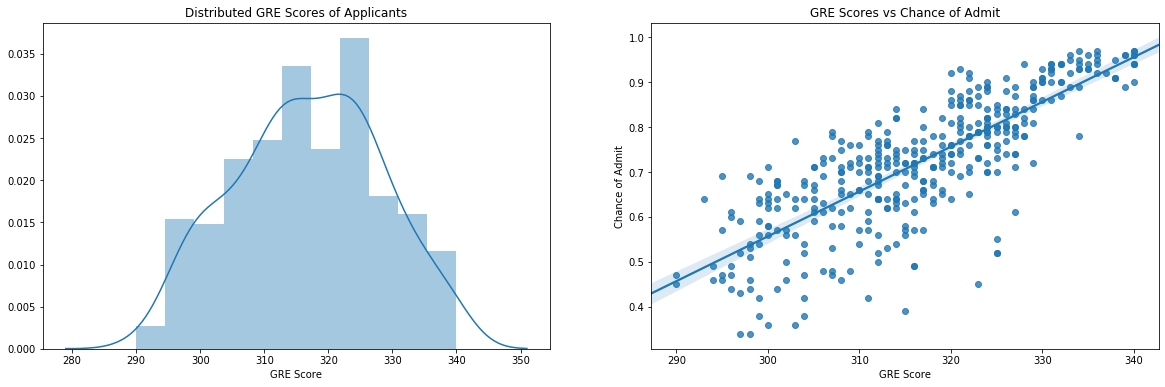

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

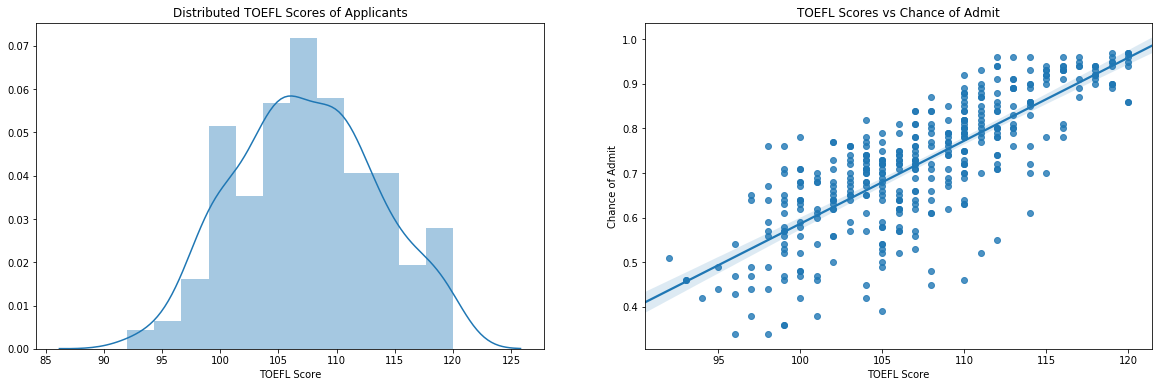

In [9]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

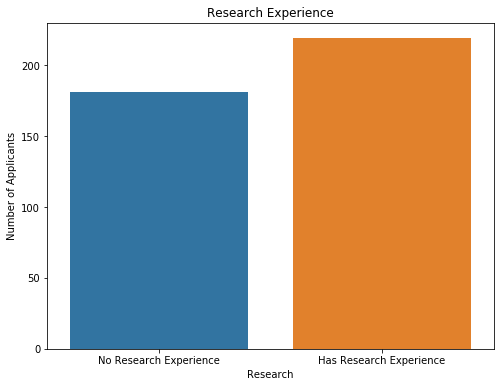

In [10]:
#plot the countplot
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

Text(0, 0.5, 'Number of Applicants')

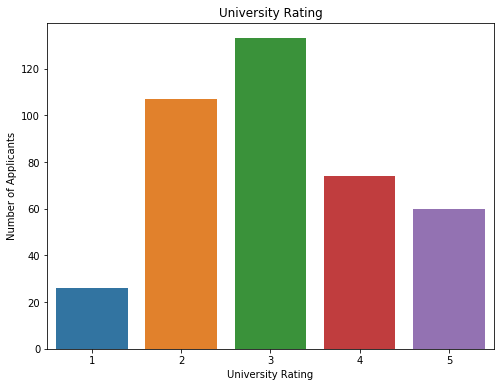

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [12]:
#testing and predection
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [13]:
#fitting the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
#linearregression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

81.73867881114431

In [15]:
#decesion tree regression model
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

73.99851580517213

In [16]:
#random forest regression model
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

81.35407137081936

Text(0, 0.5, 'Accuracy')

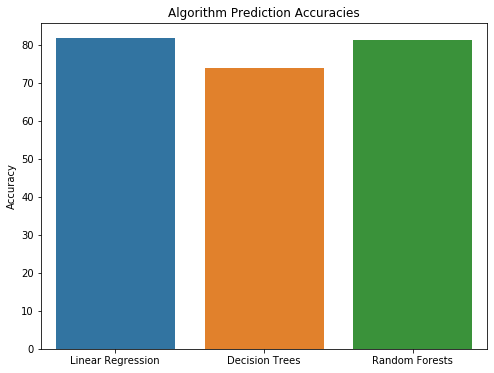

In [17]:
#displaying bar graph of linear regression,decision tree and random forest
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In [1]:
# from the above bar plot we can conclude thar linear regression give more accuracy than decesiontree and randomforest